# 비정상 절차서 19-02 : 가압기 안전밸브(BB-PSV008/009/010) 고장

경보 및 증상

자동 동작사항

긴급 조치사항

후속 조치사항

## 1.0 데이터 처리

In [2]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
with open('D:/1.All_python_project/New_CNS_db/ab19_02_9_(1123).pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5)}

## 2.0 경보 및 증상

### 2.1 가압기 안전밸브 출구 고온 경보(주위온도＋10℃ : JP006)

관련 경보 확인불가.

### 2.2 가압기 안전밸브 출구온도 기록계 지시치 증가(BB-TR465 : JP005)

계치시 변수 확인불가

### 2.3 음향감시계기 주의 및 경보(주의 0.062Vrms, 경보 0.125Vrms : JP015)

관련 경보 확인불가.

### 2.4 가압기 보조전열기 지시등 켜짐 및 경보(155.4㎏/㎠ : JP006)

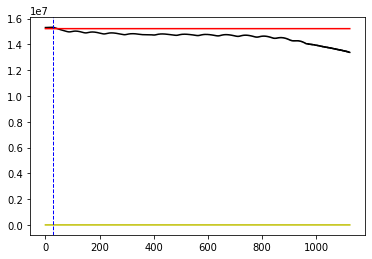

In [36]:
# KLAMPO312 : ALARM: PRZ PRESS LOW BACK-UP HEATER ON(153.6 KG/CM2) 
# PPRZN : 가압기 압력
# CQPRZB : 가압기 보조전열기 켜짐 SETPOINT
# KBHON : 보조전열기 STATE
plt.plot(db['PPRZN'], color='k')
plt.plot(db['CQPRZB'], color='r')
plt.plot(db['KBHON'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [37]:
heater_state = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZN'][i] < db['CQPRZB'][i] and db['KBHON'][i]:
            heater_state.append(i+1)
if len(heater_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 보조전열기 지시등 켜짐 및 경보 시간 : {heater_state[0]}초')

최초 가압기 보조전열기 지시등 켜짐 및 경보 시간 : 45초


### 2.5 가압기 저압경보(153.7㎏/㎠ : JP006)

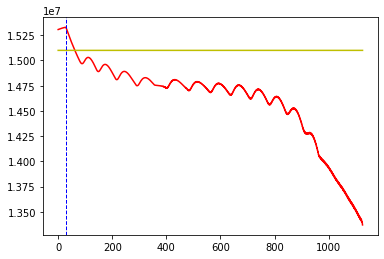

In [38]:
# KLAMPO308 : ALARM: PRZ PRESS LOW ALERT(153.6 KG/CM2) 
# PPRZ : 가압기 압력
# CPPRZL : PRZ PRESS LOW ALERT
plt.plot(db['PPRZ'], color='r')
plt.plot(db['CPPRZL'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [39]:
pzr_press = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < db['CPPRZL'][i]:
            pzr_press.append(i+1)
if len(pzr_press) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 저압력경보 시간 : {pzr_press[0]}초')

최초 가압기 저압력경보 시간 : 63초


### 2.6 가압기 압력방출밸브(PORV) 차단 경보(153.7㎏/㎠ : JP004)

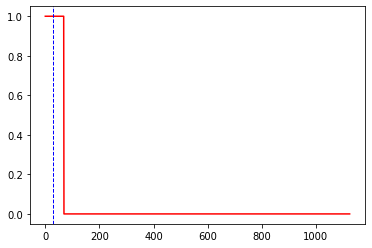

In [14]:
plt.plot(db['BHV6'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

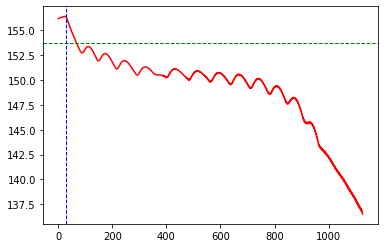

In [41]:
plt.plot(db['ZINST65'], color='r')
# plt.plot(db['PPRZ'], color='k')
# plt.plot(db['PPRZN'], color='y')
vline = plt.axhline(153.7, color='g', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [42]:
porv_state = []
for i in range(len(db)):
    if i > 29:
        if db['BHV6'][i] == 0 and db['ZINST65'][i] <= 153.7:
            porv_state.append(i+1)
if len(porv_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 압력방출밸브(PORV) 차단 경보 시간 : {porv_state[0]}초')

최초 가압기 압력방출밸브(PORV) 차단 경보 시간 : 70초


### 2.7 가압기 압력방출탱크(PRT) 고압력 경보(0.6㎏/㎠ : JP006)

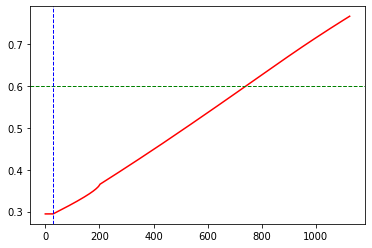

In [49]:
# PPRT : PRT 압력
# CPPRT : PRT press high
# ZINST48 : PRT 압력 (㎏/㎠)
# KLAMPO318
plt.plot(db['ZINST48'], color='r')
vline = plt.axhline(0.6, color='g', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

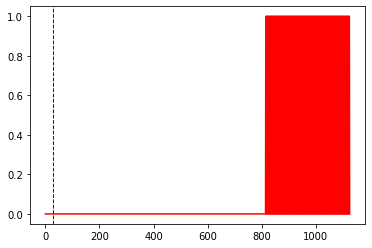

In [46]:
plt.plot(db['KLAMPO318'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [47]:
prt_press = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST48'][i] >= 0.6:
            prt_press.append(i+1)
if len(prt_press) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 압력방출탱크(PRT) 고압 경보 시간 : {prt_press[0]}초')

최초 가압기 압력방출탱크(PRT) 고압 경보 시간 : 743초


In [52]:
prt_press_alarm = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO318'][i] == 1:
            prt_press_alarm.append(i+1)
if len(prt_press_alarm) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 압력방출탱크(PRT) 고압 경보 시간 : {prt_press_alarm[0]}초')

최초 가압기 압력방출탱크(PRT) 고압 경보 시간 : 816초


alarm logic의 만족 시간과 alarm 작동 신호의 시간이 다름.

정확한 변수를 확인할 필요가 있음.

### 2.8 가압기 압력방출탱크(PRT) 고온 경보(45℃ : JP006)

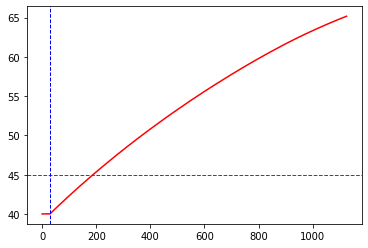

In [51]:
# UPRT : PRT 온도
plt.plot(db['UPRT'], color='r')
vline = plt.axhline(45, color='g', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [53]:
prt_temp = []
for i in range(len(db)):
    if i > 29:
        if db['UPRT'][i] >= 45:
            prt_temp.append(i+1)
if len(prt_temp) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 압력방출탱크(PRT) 고압 경보 시간 : {prt_temp[0]}초')

최초 가압기 압력방출탱크(PRT) 고압 경보 시간 : 189초


### 2.9 가압기 압력방출탱크(PRT) 고수위 경보(85% : JP006)

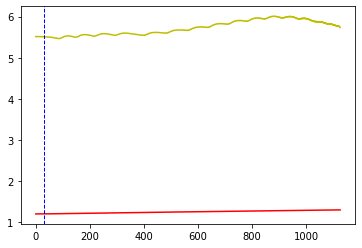

In [61]:
# ZPRTL : PRT 수위 (M)
# ZPRZ : PRT 수위
plt.plot(db['ZPRTL'], color='r')
plt.plot(db['ZPRZ'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

PRT수위 기준확인 불가

1. 85%의 수위가 몇 M인지
2. ZPRZ변수의 단위가 %인지 M인지 확인 불가
3. 해당 경보 변수 없음.

### 2.10 가압기 수위 변화

※ 참고사항 :  가압기 수위는 증가하는 것처럼 보일 수도 있다.

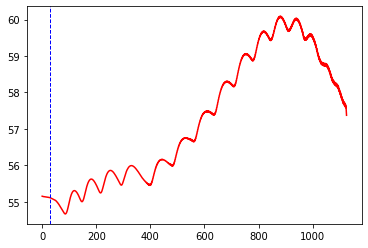

In [62]:
# ZINST63 : 가압기 수위
plt.plot(db['ZINST63'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [71]:
pzr_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[0].append(db['ZINST63'][i])
        if len(sym_ch[0]) == 5:
            if sym_ch[0][0] < sym_ch[0][1] < sym_ch[0][2]:
                pzr_level.append(i+1)
if len(pzr_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 수위 증가 시간 : {pzr_level[0]}초')

최초 가압기 수위 증가 시간 : 91초


가압기의 수위변화를 수위 증가만 고려할지 (참고사항 :  가압기 수위는 증가하는 것처럼 보일 수도 있다.)

### 2.11 충전유량 증가(BG-FI122A : JP001)

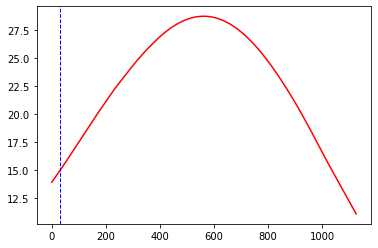

In [6]:
# WCHGNO : NORMAL CHARGING FLOW.
# WNETCH : NET CHARGING FLOW TO RCS (KG/SEC)
# ZINST39 : CHARGING FLOW     
plt.plot(db['ZINST39'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

충전유량을 나타내는 변수 3개 모두 같은 거동을 보임

단, 단위가 다른것으로 판단됨.

In [82]:
charging_flow = []
for i in range(len(db)):
    if i > 29:
        sym_ch[1].append(db['ZINST39'][i])
        if len(sym_ch[1]) == 5:
            if sym_ch[1][0] < sym_ch[1][1] < sym_ch[1][2]:
                charging_flow.append(i+1)
if len(charging_flow) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 충전 유량 증가 시간 : {charging_flow[0]}초')

최초 충전 유량 증가 시간 : 35초


### 2.12 체적제어탱크 수위감소 및 원자로보충수 보충횟수 증가

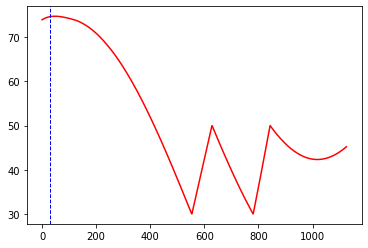

In [83]:
# ZVCT : VCT 수위
plt.plot(db['ZVCT'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [7]:
vct_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[2].append(db['ZVCT'][i])
        if len(sym_ch[2]) == 5:
            if sym_ch[2][0] > sym_ch[2][1] > sym_ch[2][2]:
                vct_level.append(i+1)
if len(vct_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 체적제어탱크 수위감소 시간 : {vct_level[0]}초')

최초 체적제어탱크 수위감소 시간 : 53초


## 3.0 자동 동작사항

### 3.1 가압기 보조전열기 켜짐(155.4㎏/㎠)

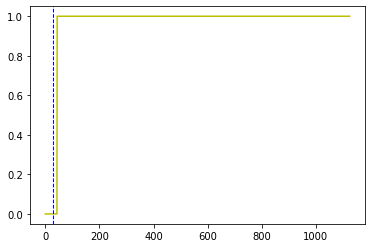

In [12]:
# KBHON : 보조전열기 STATE
plt.plot(db['KBHON'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [11]:
heater_state_ = []
for i in range(len(db)):
    if i > 29:
        if db['KBHON'][i] == 1:
            heater_state_.append(i+1)
if len(heater_state_) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 보조전열기 지시등 켜짐 시간 : {heater_state_[0]}초')

최초 가압기 보조전열기 지시등 켜짐 시간 : 45초


### 3.2 가압기 압력방출밸브의 차단밸브 닫힘(153.7㎏/㎠)

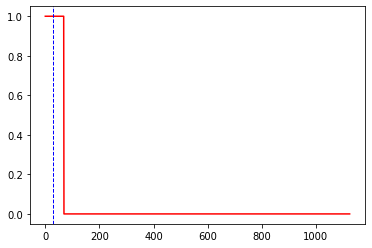

In [15]:
plt.plot(db['BHV6'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [16]:
porv_state_ = []
for i in range(len(db)):
    if i > 29:
        if db['BHV6'][i] == 1:
            porv_state_.append(i+1)
if len(porv_state_) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 압력방출밸브의 차단밸브 닫힘 시간 : {porv_state_[0]}초')

최초 가압기 압력방출밸브의 차단밸브 닫힘 시간 : 31초


### 3.3 원자로 트립(136.7㎏/㎠)

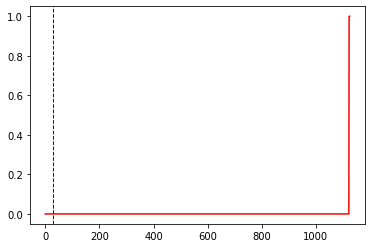

In [19]:
# KLAMPO9 : REACTOR TRIP
plt.plot(db['KLAMPO9'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [17]:
trip_state = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO9'][i] == 1:
            trip_state.append(i+1)
if len(trip_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 원자로 트립 시간 : {trip_state[0]}초')

최초 원자로 트립 시간 : 1124초


### 3.4 안전주입 작동(126.6㎏/㎠)

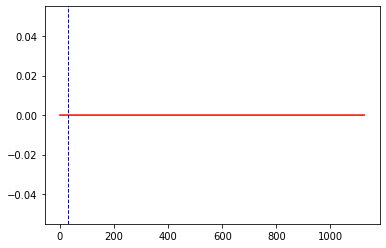

In [20]:
# KLAMPO6 : SAFETY INJECTION ACTUATION
plt.plot(db['KLAMPO6'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [21]:
si_state = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO6'][i] == 1:
            si_state.append(i+1)
if len(si_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 안전주입 작동 시간 : {si_state[0]}초')

증상을 만족하지 못했습니다.


## 4.0 긴급 조치사항

### 4.1 원자로냉각재 압력을 운전 가능한 최소 압력까지 내려서 누설이 차단 되는지 확인한다.

### 4.2 누설이 차단되면 원자로냉각재 압력을 정상으로 복귀한다.

### 4.3 누설이 차단되지 않으면 후속 조치사항에 따른다.

### 4.4 만일 원자로 트립이나 안전주입이 발생되었으면 비상운전 절차서 비상-0(원자로 트립 또는 안전주입)를 수행한다.